In [1]:
import numpy as np

from dataclasses import dataclass


@dataclass
class KMeans:
    features: np.ndarray
    k: np.ndarray
    iterations: int

    def __post_init__(self) -> None:
        """Initializes additional variables for the K-Means Clustering (KMeans) model."""

        num_samples = self.features.shape[0]

        self.centroids = self.features[np.random.choice(num_samples, size=self.k, replace=False)]
        self.closest = np.zeros(num_samples)

    def cluster(self) -> None:
        """Clusters the data according to the K-Means Clustering (KMeans) algorithm."""

        for _ in range(self.iterations):
            old_closest = self.closest.copy()
            self.closest = np.argmin([np.linalg.norm(self.centroids - feature, axis=1) for feature in self.features], axis=1)

            for idx in range(self.k):
                self.centroids[idx] = (self.features[self.closest == idx]).mean(axis=0)

            if np.array_equal(self.closest, old_closest):
                break

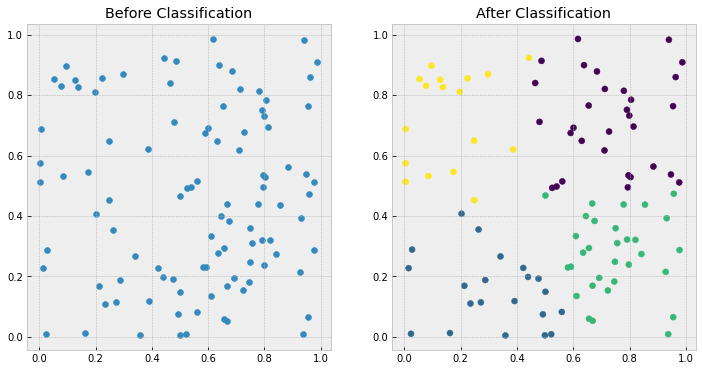

In [2]:
import matplotlib.pyplot as plt


np.random.seed(79)
plt.style.use("bmh")

features = np.random.rand(100, 2)

kmeans = KMeans(features, k=4, iterations=10)
kmeans.cluster()

plt.figure(figsize=(12, 6), dpi=72)
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], features[:, 1])
plt.title("Before Classification")

plt.subplot(1, 2, 2)
plt.scatter(features[:, 0], features[:, 1], c=kmeans.closest)
plt.title("After Classification")

plt.show()